## Librerías

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Carga y descripción de datos


In [ ]:
df = sns.load_dataset('tips')
df.head()

print("\nTipos de datos:")
print(df.dtypes)

print("\nResumen estadístico:")
print(df.describe)

print("\nValores nulos:")
print(df.isnull().sum())


Tipos de datos:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Resumen estadístico:
<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

Valores nulos:
total_bill    0
tip        

## Análisis exploratorio

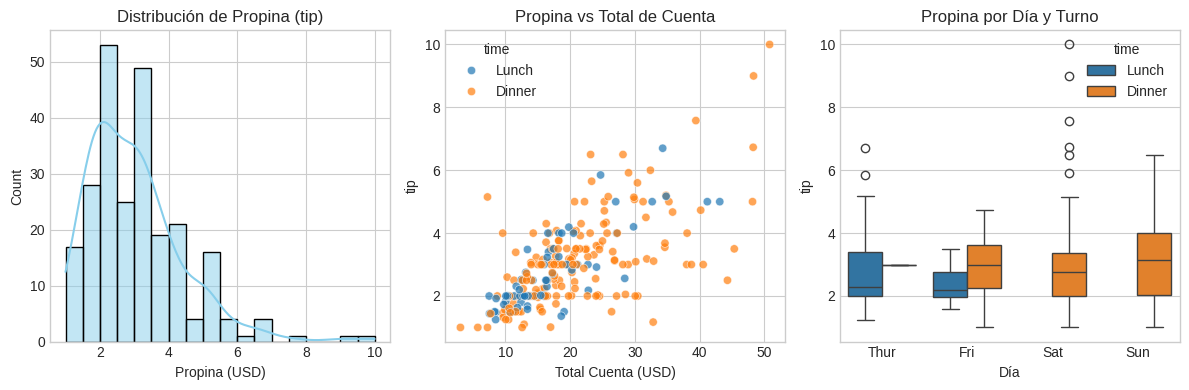

In [ ]:
# Gráfico 1: Distribución de tip
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['tip'], kde=True, color='skyblue')
plt.title('Distribución de Propina (tip)')
plt.xlabel('Propina (USD)')

# Gráfico 2: total_bill vs tip
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', alpha=0.7)
plt.title('Propina vs Total de Cuenta')
plt.xlabel('Total Cuenta (USD)')

# Gráfico 3: Boxplot por día
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='day', y='tip', hue='time')
plt.title('Propina por Día y Turno')
plt.xlabel('Día')

plt.tight_layout()
plt.show()

## Limpieza

In [ ]:
print(f"\nFilas antes de limpieza: {len(df)}")

# Definir umbrales realistas
df_clean = df[(df['total_bill'] <= 50) & (df['tip'] <= 10)].copy()

print(f"Filas después de limpieza: {len(df_clean)}")
print(f"Eliminados: {len(df) - len(df_clean)} registros")

#Guardar dataset limpio
df_clean.to_csv('tips_clean.csv', index=False)
print("\nDataset limpio guardado como 'tips_clean.csv'")


# Verificación de categorías
print("Categorías únicas:")
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"{col}: {df[col].unique().tolist()}")

# Mostrar dataset final
df_clean


Filas antes de limpieza: 244
Filas después de limpieza: 243
Eliminados: 1 registros

Dataset limpio guardado como 'tips_clean.csv'
Categorías únicas:
sex: ['Female', 'Male']
smoker: ['No', 'Yes']
day: ['Sun', 'Sat', 'Thur', 'Fri']
time: ['Dinner', 'Lunch']


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Preparación de la data

In [ ]:
df = pd.read_csv('tips_clean.csv')

X = df.drop('tip', axis=1)
y = df['tip']

numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelado


In [ ]:
# Regresión Lineal
model_lr = Pipeline([('prep', preprocessor),
                     ('lr', LinearRegression())])
model_lr.fit(X_train, y_train)

# Árbol de Decisión
model_dt = Pipeline([('prep', preprocessor),
                     ('dt', DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42))])
model_dt.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

print("\n=== MÉTRICAS ===")
print("Regresión Lineal:")
print(f"  R²  : {r2_score(y_test, y_pred_lr):.3f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_lr):.3f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.3f}")

print("\nÁrbol de Decisión:")
print(f"  R²  : {r2_score(y_test, y_pred_dt):.3f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_dt):.3f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.3f}")


=== MÉTRICAS ===
Regresión Lineal:
  R²  : 0.420
  MAE : 0.705
  RMSE: 0.939

Árbol de Decisión:
  R²  : 0.369
  MAE : 0.785
  RMSE: 0.979


FileNotFoundError: [Errno 2] No such file or directory: 'capturas/pred_real_lr.png'

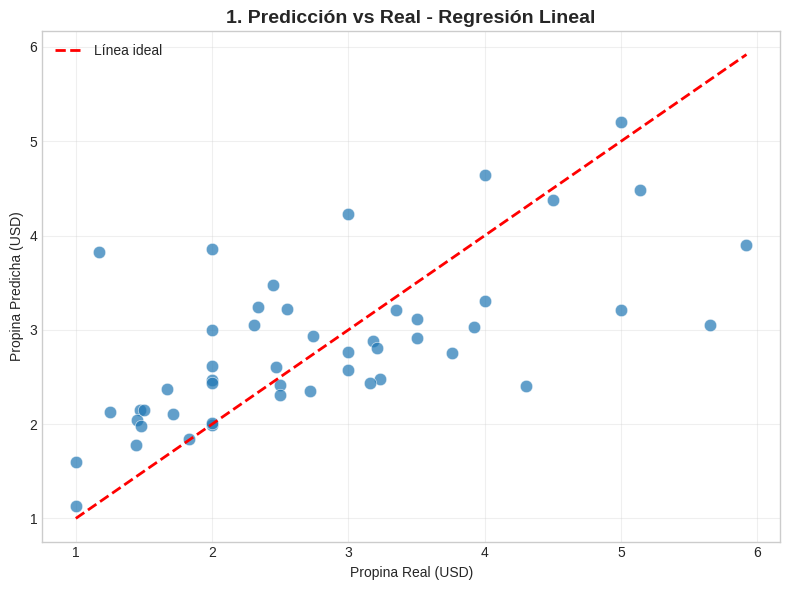

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

def plot_pred_real(y_real, y_pred, titulo, color, archivo):
    plt.figure(figsize=(8,6))
    plt.scatter(y_real, y_pred, color=color, alpha=0.7, s=80, edgecolor='white', linewidth=0.5)
    min_v = min(y_real.min(), y_pred.min())
    max_v = max(y_real.max(), y_pred.max())
    plt.plot([min_v, max_v], [min_v, max_v], 'r--', lw=2, label='Línea ideal')
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel('Propina Real (USD)')
    plt.ylabel('Propina Predicha (USD)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'capturas/{archivo}.png', dpi=300)
    plt.show()

# Gráfico 1: Regresión Lineal
plot_pred_real(y_test, y_pred_lr, '1. Predicción vs Real - Regresión Lineal', '#1f77b4', 'pred_real_lr')

# Gráfico 2: Árbol de Decisión
plot_pred_real(y_test, y_pred_dt, '2. Predicción vs Real - Árbol de Decisión', '#ff7f0e', 'pred_real_dt')

# Gráfico 3: Comparación ambos modelos
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_lr, color='#1f77b4', alpha=0.7, s=80, edgecolor='white', label='Regresión Lineal')
plt.scatter(y_test, y_pred_dt, color='#ff7f0e', alpha=0.7, s=80, edgecolor='white', label='Árbol de Decisión')
min_v = min(y_test.min(), min(y_pred_lr.min(), y_pred_dt.min()))
max_v = max(y_test.max(), max(y_pred_lr.max(), y_pred_dt.max()))
plt.plot([min_v, max_v], [min_v, max_v], 'r--', lw=2, label='Línea ideal')
plt.title('3. Comparación Ambos Modelos - Predicción vs Real', fontsize=15, fontweight='bold')
plt.xlabel('Propina Real (USD)')
plt.ylabel('Propina Predicha (USD)')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('capturas/comparacion_ambos_modelos.png', dpi=300)
plt.show()

## Gráficos Predicción VS Real

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

min_val = min(y_test.min(), min(y_pred_lr.min(), y_pred_dt.min()))
max_val = max(y_test.max(), max(y_pred_lr.max(), y_pred_dt.max()))
ax.plot([min_val, max_val], [min_val, max_val],
        color='red', linestyle='--', linewidth=2, label='Línea Ideal (y = x)')

# Puntos Regresión Lineal
ax.scatter(y_test, y_pred_lr,
           color='#1f77b4', alpha=0.7, s=80, label='Regresión Lineal', edgecolors='white', linewidth=0.5)

# Puntos Árbol de Decisión
ax.scatter(y_test, y_pred_dt,
           color='#ff7f0e', alpha=0.7, s=80, label='Árbol de Decisión', edgecolors='white', linewidth=0.5)

# Estética profesional
ax.set_title('Comparación de Modelos: Predicción vs Valor Real de la Propina (tip)\nDataset: tips (241 registros)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Valor Real de la Propina (USD)', fontsize=14)
ax.set_ylabel('Valor Predicho de la Propina (USD)', fontsize=14)
ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)

# Añadir métricas en el gráfico
textstr = '\n'.join((
    'Regresión Lineal:',
    f'   R² = {r2_score(y_test, y_pred_lr):.3f}',
    f'   MAE = {mean_absolute_error(y_test, y_pred_lr):.3f}',
    '',
    'Árbol de Decisión:',
    f'   R² = {r2_score(y_test, y_pred_dt):.3f}',
    f'   MAE = {mean_absolute_error(y_test, y_pred_dt):.3f}'
))
props = dict(boxstyle='round', facecolor='lightgray', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Grid y límites
ax.grid(True, alpha=0.3)
ax.set_xlim(min_val * 0.95, max_val * 1.05)
ax.set_ylim(min_val * 0.95, max_val * 1.05)

# Guardar en alta calidad
plt.tight_layout()
if not os.path.exists('capturas'):
    os.makedirs('capturas')
plt.savefig('capturas/comparacion_modelos_pred_vs_real.png', dpi=300, bbox_inches='tight')
plt.show()